In [7]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# database full path
database_name = 'whistlers.h5'
database_location = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'Data')
database_path = os.path.join(database_location,database_name)

# data variables
awd_events = 2
sites = ['marion', 'sanae']

In [9]:
def extract_spectrogram_info(spectrogram_data):
    '''Extract the time, frequency axis values as well as the 
            spectrogram data.
    inputs:
        spectrogram_data: the spectrogram data including the 
        time and frequency information.
    outputs: 
        time: time values
        frequency: frequency values
        spectrogram: spectrogram
    '''
    time = spectrogram_data[0,1:]
    frequency = spectrogram_data[1:,0]
    spectrogram = spectrogram_data[1:,1:]
    print(time.shape, frequency.shape, spectrogram.shape)
    return time, frequency, spectrogram

(1482,) (257,) (257, 1482)
(284672,)


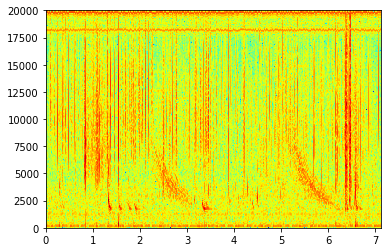

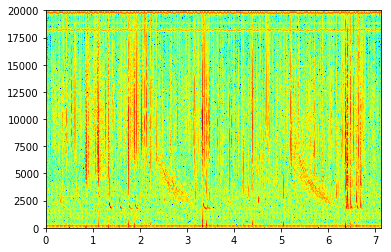

In [11]:
_f  = h5py.File(database_path, 'r')



# # load from labelled data
grp_spe = _f[os.path.join('awdEvents'+str(1), sites[0],'labelled spectrograms')]
files = list(grp_spe.keys())
file = files[np.random.randint(len(files))] # select a random sample
# create np array to store sample information
data = np.empty(grp_spe[file].shape)
# load information
grp_spe[file].read_direct(data)
out = grp_spe[file].attrs['outputs']
event = grp_spe[file].attrs['events']
t,f,s = extract_spectrogram_info(data)

# load from whistler trace
grp_wh = _f[os.path.join('awdEvents'+str(1), sites[0],'whistler traces')]
whdf = np.empty(grp_wh[file].shape)
grp_wh[file].read_direct(whdf)
fs = grp_wh[file].attrs['sample frequency']
print(whdf[:,0].shape)

_f.close()


plt.pcolormesh(t,f,s, cmap='jet')

fig = plt.figure()
ax1 = plt.gca()
s, f, t, img = ax1.specgram(whdf[:,0], Fs=fs, detrend='linear', NFFT=512 , noverlap=64, scale='dB', scale_by_freq=False, cmap='jet')
